In [1]:
import requests
import bs4

Pobranie htmla

In [2]:
page_url = "https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=1"

req = requests.get(page_url)

Zobaczmy co jest w środku zmiennej req

In [3]:
req.text

'<!doctype html>\n<html lang="pl-PL">\n\n<head>\n    \n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta http-equiv="Content-Language" content="pl">\n\n        <meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale = 1.0, shrink-to-fit=no">\n\n\n    <title>Książki z kategorii informatyka, matematyka | Lubimyczytać.pl</title>\n            <meta http-equiv="X-DNS-Prefetch-Control" content="on">\n        <link rel="preconnect" href="https://fonts.gstatic.com">\n    <link rel="preconnect" href="https://buybox.click">\n\n    <link rel="preconnect" href="https://s.lubimyczytac.pl">\n    <link rel="preconnect" href="https://cdn.cookielaw.org">\n        <link rel="dns-prefetch" href="//s.lubimyczytac.pl/">\n            <link rel="dns-prefetch" href="//connect.facebook.net">\n    <link rel="dns-prefetch" href="//static.ak.facebook.com">\n    <link rel="dns-prefetch" href="//staticxx.facebook.com">\n    <link rel="dns-prefetch" href="//

Potrzebujemy sparsować nasz html pobrany

In [4]:
doc = bs4.BeautifulSoup(req.text)

In [5]:
doc

<!DOCTYPE html>
<html lang="pl-PL">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="pl" http-equiv="Content-Language"/>
<meta content="width=device-width, initial-scale=1, minimum-scale = 1.0, shrink-to-fit=no" name="viewport"/>
<title>Książki z kategorii informatyka, matematyka | Lubimyczytać.pl</title>
<meta content="on" http-equiv="X-DNS-Prefetch-Control"/>
<link href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://buybox.click" rel="preconnect"/>
<link href="https://s.lubimyczytac.pl" rel="preconnect"/>
<link href="https://cdn.cookielaw.org" rel="preconnect"/>
<link href="//s.lubimyczytac.pl/" rel="dns-prefetch"/>
<link href="//connect.facebook.net" rel="dns-prefetch"/>
<link href="//static.ak.facebook.com" rel="dns-prefetch"/>
<link href="//staticxx.facebook.com" rel="dns-prefetch"/>
<link href="//s-static.ak.facebook.com" rel="dns-prefetch"/>
<link href="//fbstatic-a.akamaihd.net" rel="dns-prefetch"/>
<link href="//ads

Chcemy wyciągnąć wszystkie divy gdzie class = authorAllBooks__single

In [6]:
books = doc.find_all("div", class_="authorAllBooks__single")

In [8]:
one_book = books[5]
one_book

<div class="authorAllBooks__single" id="listBookElement5121532">
<div class="row relative w-100">
</div>
<div class="row relative w-100">
<div class="col authorAllBooks__singleImg authorAllBooks__singleImg--list">
<form action="/ksiazka/5121532/ryzyko-w-cyberbezpieczenstwie-metody-modelowania-pomiaru-i-szacowania-ryzyka-wydanie-ii" class="formToHref authorAllBooks__singleImgWrap authorAllBooks__singleImgWrap__hovered" method="post" rel="nofollow">
<input class="btn--serie-save" type="submit"/>
<img alt="Okładka książki Ryzyko w cyberbezpieczeństwie. Metody modelowania, pomiaru i szacowania ryzyka. Wydanie II Richard Seiersen, Douglas W. Hubbard" class="img-fluid" data-src="https://s.lubimyczytac.pl/upload/books/5121000/5121532/1164565-170x243.jpg" loading="lazy" src="https://s.lubimyczytac.pl/upload/books/5121000/5121532/1164565-170x243.jpg"/>
</form>
</div>
<div class="col authorAllBooks__singleCenter authorAllBooks__singleCenter--list">
<div class="authorAllBooks__singleText relative

Tytuł książki - dane z a, class = authorAllBooks__singleTextTitle

In [13]:
title = one_book.find("a", class_="authorAllBooks__singleTextTitle").text
title = title.replace("\n", "").replace("  ", "")
title

'Ryzyko w cyberbezpieczeństwie. Metody modelowania, pomiaru i szacowania ryzyka. Wydanie II'

Rating książki - listLibrary__ratingStarsNumber

In [17]:
rating = one_book.find("span", class_ = "listLibrary__ratingStarsNumber").text
rating = rating.replace("\n", "").replace("  ", "").replace(",", ".")
rating = float(rating)
rating

0.0

autor książki

In [18]:
author = one_book.find("div", class_="authorAllBooks__singleTextAuthor").text
author = author.replace("\n", "").replace("  ", "")
author

'Douglas W. Hubbard, Richard Seiersen'

zdjecie okładki książki

In [20]:
one_book.find("img")["data-src"]

'https://s.lubimyczytac.pl/upload/books/5121000/5121532/1164565-170x243.jpg'

Ilosc czytelnikow

In [25]:
readers = one_book.find("span", class_="small grey mr-2 mb-3").text
readers = readers.replace("\n", "").replace("  ", "").replace("Czytelnicy:", "")
readers = int(readers)
readers

4

Ile opinii

In [29]:
review_nb = one_book.find("span", class_="ml-2 small grey").text
review_nb = review_nb.replace("\n", "").replace("  ", "").replace("Opinie:", "")
review_nb = int(review_nb)
review_nb

0

Ilość ocen

In [33]:
marks_nb = one_book.find("div", class_="listLibrary__ratingAll").text
marks_nb = marks_nb.replace("\n", "").replace("  ", "").replace("ocen", "")
marks_nb = 0 if marks_nb == " " else marks_nb
marks_nb = int(marks_nb)
marks_nb

0

Metoda to wyciągania informacji o książce

In [34]:
def get_book_info(one_book):
  title = one_book.find("a", class_="authorAllBooks__singleTextTitle").text
  title = title.replace("\n", "").replace("  ", "")

  rating = one_book.find("span", class_ = "listLibrary__ratingStarsNumber").text
  rating = rating.replace("\n", "").replace("  ", "").replace(",", ".")
  rating = float(rating)

  author = one_book.find("div", class_="authorAllBooks__singleTextAuthor").text
  author = author.replace("\n", "").replace("  ", "")

  readers = one_book.find("span", class_="small grey mr-2 mb-3").text
  readers = readers.replace("\n", "").replace("  ", "").replace("Czytelnicy:", "")
  readers = int(readers)

  review_nb = one_book.find("span", class_="ml-2 small grey").text
  review_nb = review_nb.replace("\n", "").replace("  ", "").replace("Opinie:", "")
  review_nb = int(review_nb)

  marks_nb = one_book.find("div", class_="listLibrary__ratingAll").text
  marks_nb = marks_nb.replace("\n", "").replace("  ", "").replace("ocen", "")
  marks_nb = 0 if marks_nb == " " else marks_nb
  marks_nb = int(marks_nb)

  return (title, rating, author, readers, review_nb, marks_nb)


Wyciągnięcie informacji dla każdej książki z listy

In [35]:
books_info = [get_book_info(book) for book in books]

In [36]:
books_info

[('(CALL/WHATSAPP+447932551146}}ELECTRIC POWER WHEELCHAIR FOR SALE ACCROSS USA',
  0.0,
  'David Lodge',
  0,
  0,
  0),
 ('ELECTRIC POWER WHEELCHAIR FOR SALE ACCROSS EUROPE((CALL/WHATSAPP+447932551146))',
  0.0,
  'David Lodge',
  0,
  0,
  0),
 ('Python dla Ekspertów', 0.0, 'Kevin Clarkson', 0, 0, 0),
 ('Uczenie maszynowe w Pythonie. Deep learning i machine learning',
  0.0,
  'Kevin Clarkson',
  0,
  0,
  0),
 ('Prompt Engineering - zostań Panem Sztucznej Inteligencji. Jak zdobyć pracę jako prompt engineer, jak pisać prompty do ChatGPT, jak pisać prompty do AI',
  0.0,
  'Logan Anderson',
  0,
  0,
  0),
 ('Ryzyko w cyberbezpieczeństwie. Metody modelowania, pomiaru i szacowania ryzyka. Wydanie II',
  0.0,
  'Douglas W. Hubbard, Richard Seiersen',
  4,
  0,
  0),
 ('Learning Microsoft Power Apps', 0.0, 'Arpit Shrivastava', 1, 0, 0),
 ('Makra i VBA w tydzień. Odkryj potęgę programowania!',
  0.0,
  'Mateusz Boryga',
  2,
  0,
  0),
 ('Statystyka matematyczna', 0.0, 'Przemysław Grzegor

Metoda do pobrania danych z wielu stron

In [49]:
def get_page_info(page_nb):
  page_url = f"https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page={page_nb}"
  print(f"Pobieram informacje ze strony {page_url}")
  req = requests.get(page_url)
  doc = bs4.BeautifulSoup(req.text)
  books = doc.find_all("div", class_="authorAllBooks__single")
  books_info = [get_book_info(book) for book in books]
  return books_info

Petla *for*  i zapis informacji o ksiazkach do zmiennej all_books

In [50]:
all_books = []

for page_nb in range(1, 10):
  print(f"Pobieram informacje ze strony {page_nb}")
  books_info = get_page_info(page_nb)
  all_books.extend(books_info)


Pobieram informacje ze strony 1
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=1
Pobieram informacje ze strony 2
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=2
Pobieram informacje ze strony 3
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=3
Pobieram informacje ze strony 4
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=4
Pobieram informacje ze strony 5
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=5
Pobieram informacje ze strony 6
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=6
Pobieram informacje ze strony 7
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/63/informatyka-matematyka?page=7
Pobieram informacje ze strony 8
Pobieram informacje ze strony https://lubimyczytac.pl/ksiazki/k/6

Stworzenie z surowych danych datafarmeu, który umożliwi operacje na danych

In [51]:
import pandas as pd
book_dataset = pd.DataFrame(all_books, columns=["title", "rating", "author", "readers", "review_nb", "marks_nb"])
book_dataset


,title,rating,author,readers,review_nb,marks_nb
0,(CALL/WHATSAPP+447932551146}}ELECTRIC POWER WH...,0.0,David Lodge,0,0,0
1,ELECTRIC POWER WHEELCHAIR FOR SALE ACCROSS EUR...,0.0,David Lodge,0,0,0
2,Python dla Ekspertów,0.0,Kevin Clarkson,0,0,0
3,Uczenie maszynowe w Pythonie. Deep learning i ...,0.0,Kevin Clarkson,0,0,0
4,Prompt Engineering - zostań Panem Sztucznej In...,0.0,Logan Anderson,0,0,0
...,...,...,...,...,...,...
265,Elementarna teoria liczb,0.0,"Piotr Zarzycki, Wacław Marzantowicz",3,0,0
266,Narodziny gatunku FPS,7.3,Luke Chambers,9,0,6
267,Nauka algorytmów. Poradnik pisania lepszego kodu,8.0,George Heineman,9,0,2
268,Software Mistakes and Tradeoffs: How to Make G...,7.0,"Jon Skeet, Tomasz Lelek",6,1,1


Zapisanie naszego datasetu w formacie excelowym

In [52]:
book_dataset.to_excel("books.xlsx")

Wyświetlenie wszystkich ksiażek, z oceną większą od 8

In [53]:
book_dataset[book_dataset["rating"] > 8]

,title,rating,author,readers,review_nb,marks_nb
9,"Gry, które trzeba znać. Od GTA V do Baldur’s G...",8.6,"Michał Kuszewski, Jakub Gańko",23,1,7
20,"Wprowadzenie do Pythona. Typy danych, interfej...",10.0,Kevin Clarkson,2,0,1
21,Systemy operacyjne. Wydanie V,8.4,"Andrew S. Tanenbaum, Herbert Bos",93,1,11
29,Bitcoin w 1 dzień. Wszystko co musisz wiedzieć...,10.0,Kevin Clarkson,1,1,1
36,"Język R w jeden dzień. R od podstaw, po zaawan...",10.0,Kevin Clarkson,1,1,1
37,"Docker w 1 dzień. Docker od podstaw, po projek...",10.0,Kevin Clarkson,1,1,1
38,AI bez tajemnic. Sztuczna Inteligencja od pods...,10.0,Kevin Clarkson,8,1,2
45,Python w 1 dzień dla najmłodszych. Naucz się k...,10.0,Kevin Clarkson,3,1,3
46,Roblox Lua w 1 dzień. Naucz się kodować w Lua ...,10.0,Kevin Clarkson,2,1,1
49,Osiem lekcji o nieskończoności. Matematyczna p...,8.1,Haim Shapira,53,4,8


Normalizacja danych - każda zmienna będzie z przedziału od zera do jeden

In [62]:
book_dataset["readers_normal"] = book_dataset["readers"] / book_dataset["readers"].max()
book_dataset["rating_normal"] = book_dataset["rating"] / 10.0
book_dataset["marks_nb_normal"] = book_dataset["marks_nb"] / book_dataset["marks_nb"].max()
book_dataset["review_nb_normal"] = book_dataset["review_nb"] / book_dataset["review_nb"].max()
book_dataset

,title,rating,author,readers,review_nb,marks_nb,Success,readers_normal,rating_normal,marks_nb_normal,review_nb_normal
0,(CALL/WHATSAPP+447932551146}}ELECTRIC POWER WH...,0.0,David Lodge,0,0,0,0,0.000000,0.00,0.000000,0.000000
1,ELECTRIC POWER WHEELCHAIR FOR SALE ACCROSS EUR...,0.0,David Lodge,0,0,0,0,0.000000,0.00,0.000000,0.000000
2,Python dla Ekspertów,0.0,Kevin Clarkson,0,0,0,0,0.000000,0.00,0.000000,0.000000
3,Uczenie maszynowe w Pythonie. Deep learning i ...,0.0,Kevin Clarkson,0,0,0,0,0.000000,0.00,0.000000,0.000000
4,Prompt Engineering - zostań Panem Sztucznej In...,0.0,Logan Anderson,0,0,0,0,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
265,Elementarna teoria liczb,0.0,"Piotr Zarzycki, Wacław Marzantowicz",3,0,0,0,0.008475,0.00,0.000000,0.000000
266,Narodziny gatunku FPS,7.3,Luke Chambers,9,0,6,1,0.025424,0.73,0.059406,0.000000
267,Nauka algorytmów. Poradnik pisania lepszego kodu,8.0,George Heineman,9,0,2,1,0.025424,0.80,0.019802,0.000000
268,Software Mistakes and Tradeoffs: How to Make G...,7.0,"Jon Skeet, Tomasz Lelek",6,1,1,0,0.016949,0.70,0.009901,0.066667


Sortowanie książek od największej liczby czytelników

In [55]:
book_dataset.sort_values(by="readers", ascending=False)

,title,rating,author,readers,review_nb,marks_nb
63,Lilavati,8.1,Szczepan Jeleński,354,15,101
65,Python. Instrukcje dla programisty,8.3,Matthes Eric,131,3,38
128,Informatyka w służbie ludobójstwa,7.0,Andrzej Targowski,120,1,6
89,Kod. Ukryty język komputerów. Wydanie II,7.8,Charles Petzold,108,2,27
160,Jak czesać włochatą kulę. Matma bez liczb,5.9,Milo Beckman,106,6,25
...,...,...,...,...,...,...
175,Konkursy matematyczne dla szkoły podstawowej. ...,0.0,Anna Toruńska,0,0,0
27,Tworzenie aplikacji z wykorzystaniem GPT-4 i C...,0.0,"Olivier Caelen, Marie-Alice Blete",0,0,0
1,ELECTRIC POWER WHEELCHAIR FOR SALE ACCROSS EUR...,0.0,David Lodge,0,0,0
171,"Matematyka. Porady i wskazówki, których nie ma...",0.0,Tomasz Grębski,0,0,0


Usunięcie ewentualnych duplikatow z danych

In [56]:
book_dataset.drop_duplicates(subset=["title"])

,title,rating,author,readers,review_nb,marks_nb
0,(CALL/WHATSAPP+447932551146}}ELECTRIC POWER WH...,0.0,David Lodge,0,0,0
1,ELECTRIC POWER WHEELCHAIR FOR SALE ACCROSS EUR...,0.0,David Lodge,0,0,0
2,Python dla Ekspertów,0.0,Kevin Clarkson,0,0,0
3,Uczenie maszynowe w Pythonie. Deep learning i ...,0.0,Kevin Clarkson,0,0,0
4,Prompt Engineering - zostań Panem Sztucznej In...,0.0,Logan Anderson,0,0,0
...,...,...,...,...,...,...
265,Elementarna teoria liczb,0.0,"Piotr Zarzycki, Wacław Marzantowicz",3,0,0
266,Narodziny gatunku FPS,7.3,Luke Chambers,9,0,6
267,Nauka algorytmów. Poradnik pisania lepszego kodu,8.0,George Heineman,9,0,2
268,Software Mistakes and Tradeoffs: How to Make G...,7.0,"Jon Skeet, Tomasz Lelek",6,1,1


Wizualizacja z użyciem histogramu ilości recenzji w książkach


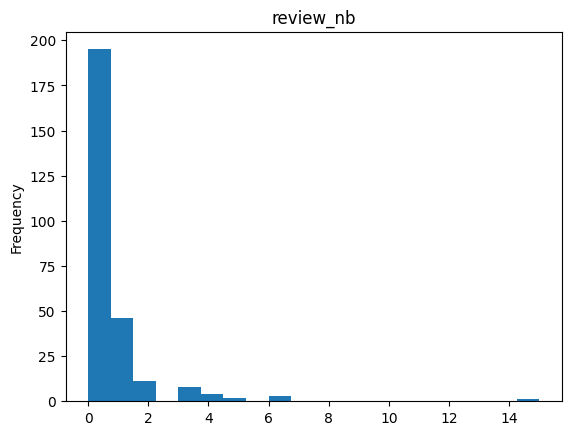

In [58]:
from matplotlib import pyplot as plt
book_dataset['review_nb'].plot(kind='hist', bins=20, title='review_nb')
plt.show()

Histogram ratingu książek

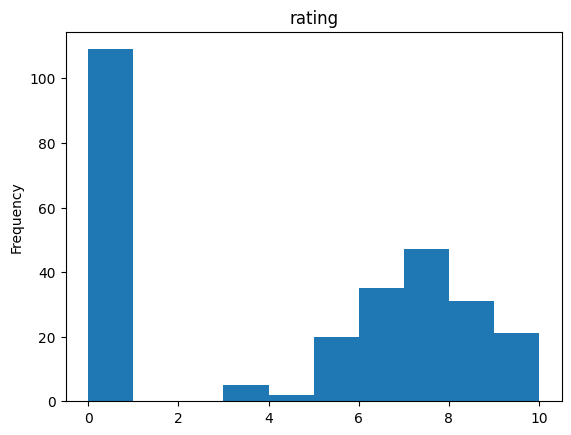

In [60]:
from matplotlib import pyplot as plt
book_dataset['rating'].plot(kind='hist', bins=10, title='rating')
plt.show()

Import bilbiotek do uczenia maszynowego  i przygotowanie danych do użycia w modelu
Stworzenie nowej zmienniej "Success" jako zmiennej która będzie celem w nauce modelu

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

book_dataset["Success"] = (book_dataset["rating"] > 7.).astype(int)

model_data = book_dataset[["readers_normal", "marks_nb_normal", "review_nb_normal", "Success"]]


Podział danych na dane do nauki i labele danych (do której grupy należeć będą, czy "dobrych" książek czy "złych" książek)

In [67]:
X = model_data.drop("Success", axis=1)
y = model_data["Success"]

Podział na dane testowe i uczące

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Stworzenie instancji modelu

In [69]:
model = RandomForestClassifier()

Nauka modelu

In [70]:
model.fit(X_train, y_train)

RandomForestClassifier()

Predykcja na danych testowych

In [71]:
y_pred = model.predict(X_test)

Obliczenie metryk mówiących o jakości naszego modelu

In [72]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7037037037037037
Confusion Matrix:
 [[30  7]
 [ 9  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.53      0.47      0.50        17

    accuracy                           0.70        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.69      0.70      0.70        54

